In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn-whitegrid')

## Process a sample file from Covid-19 datasets

## What's the number of confirmed cases in US since Covid-19's outbreak?

### Goal:
- Final processed dataframe meets the protocol for using influx-client API for importing to InfluxDB.
- Basic time series visualization can be conducted based on this processed result

In [30]:
covid = pd.read_csv('time_series_covid19_confirmed_global.csv')

In [14]:
covid

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/24/22,1/25/22,1/26/22,1/27/22,1/28/22,1/29/22,1/30/22,1/31/22,2/1/22,2/2/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,159896,160252,160692,161004,161057,161290,162111,162926,163555,164190
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,248070,248859,251015,252577,254126,254126,255741,258543,258543,261240
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,238885,241406,243568,245698,247568,249310,250774,252117,253520,254885
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,33025,34701,35028,35028,35556,35556,35556,35958,35958,36315
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,97263,97594,97812,97901,98029,98057,98076,98116,98226,98267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,...,2155784,2171527,2187481,2203208,2218137,2233287,2263053,2275727,2286750,2295494
276,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,484979,488599,492694,500444,504992,504992,504992,524716,535160,546176
277,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,10585,10585,10821,10888,10942,10942,10942,11019,11061,11113
278,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,301924,302569,303266,304002,304353,304656,304922,305047,305557,305959


In [23]:
covid_us = covid[covid['Country/Region'] == 'US']
covid_us

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/24/22,1/25/22,1/26/22,1/27/22,1/28/22,1/29/22,1/30/22,1/31/22,2/1/22,2/2/22
255,NaN,US,40.0,-100.0,1,1,2,2,5,5,...,71783483,72333439,72980648,73465396,74063641,74232238,74424305,74951445,75350359,75680487


In [24]:
covid_us = covid_us.T
covid_us = covid_us.iloc[4:,0]
covid_us

1/22/20           1
1/23/20           1
1/24/20           2
1/25/20           2
1/26/20           5
             ...   
1/29/22    74232238
1/30/22    74424305
1/31/22    74951445
2/1/22     75350359
2/2/22     75680487
Name: 255, Length: 743, dtype: object

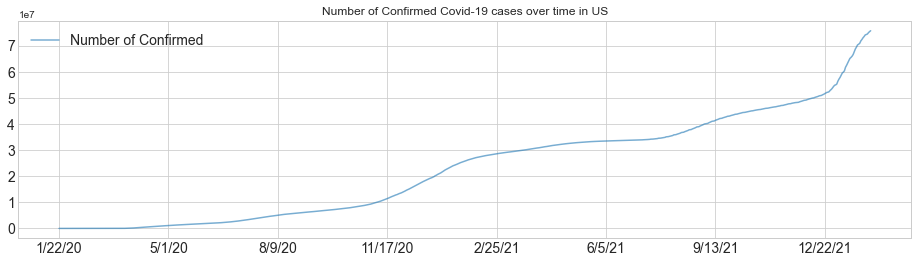

In [32]:
covid_us.plot(figsize=(16, 4), label='Number of Confirmed', title='Number of Confirmed Covid-19 cases over time in US', fontsize=14, alpha=0.6)
# plot moving average
#avg_ts.plot(label='Average number of reviews', fontsize=14)
plt.legend(fontsize=14);